In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Attributes

* buying
* maint
* doors
* persons
* lug_boot
* safety

## Loading the data

In [6]:
car_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names'

In [10]:
df = pd.read_csv(car_data, header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [26]:
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']
columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

In [27]:
df = pd.read_csv(car_data, index_col= False, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Plot the data

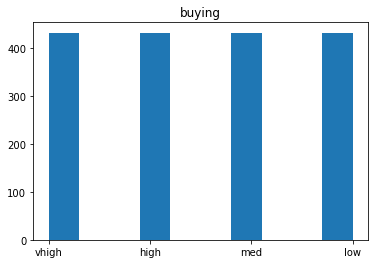

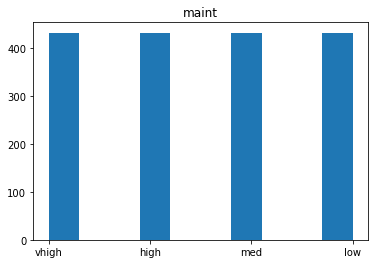

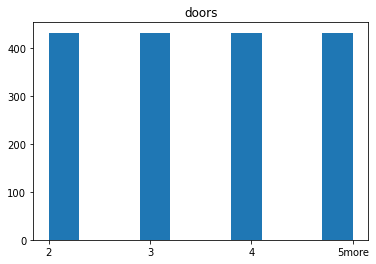

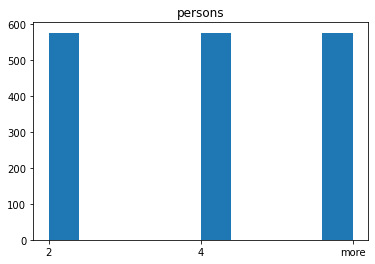

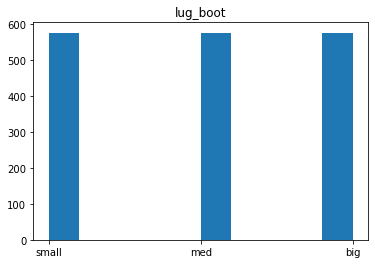

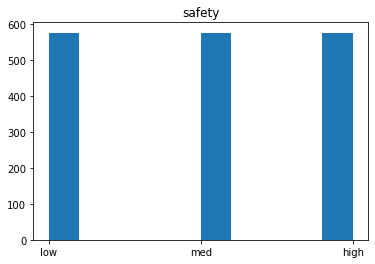

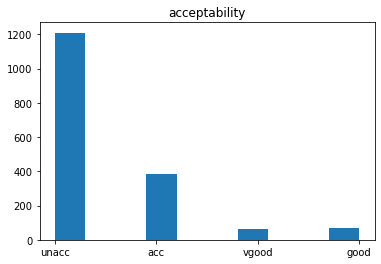

In [28]:
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

## Cleaning the data

In [29]:
df.columns = columns
df.head(4)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc


In [30]:
df = df.replace({'5more': 5, 'more': 5})
df = df.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
df = df.replace({'big': 3, 'small': 1})
df = df.replace({'acc': 1, 'unacc': 0, 'good': 2, 'vgood': 3})
df

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2


## Splitting the data

In [31]:
X, y = df.iloc[:,:-1], df.acceptability

In [32]:
# Test the results

X

,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,5,2,2
1724,1,1,5,5,2,3
1725,1,1,5,5,3,1
1726,1,1,5,5,3,2


In [33]:
# Test the results

y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: acceptability, Length: 1728, dtype: int64

In [34]:
# importing the library

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Decision tree

In [35]:
#Import the library

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(0.5960365853658537, 0.9615384615384616, 'safety <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.5838414634146342, 0.8846153846153846, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.6082317073170732, 0.8846153846153846, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.5960365853658537, 0.8076923076923077, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.6204268292682927, 0.8076923076923077, 'buying <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.3201219512195122, 0.7307692307692307, 'maint <= 1.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.11280487804878049, 0.6538461538461539, 'safety <= 2.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = good'),
 Text(0.06097560975609756, 0.5769230769230769, 'lug_boot <= 1.5\ngini = 0.456\nsamples = 31\nvalue 

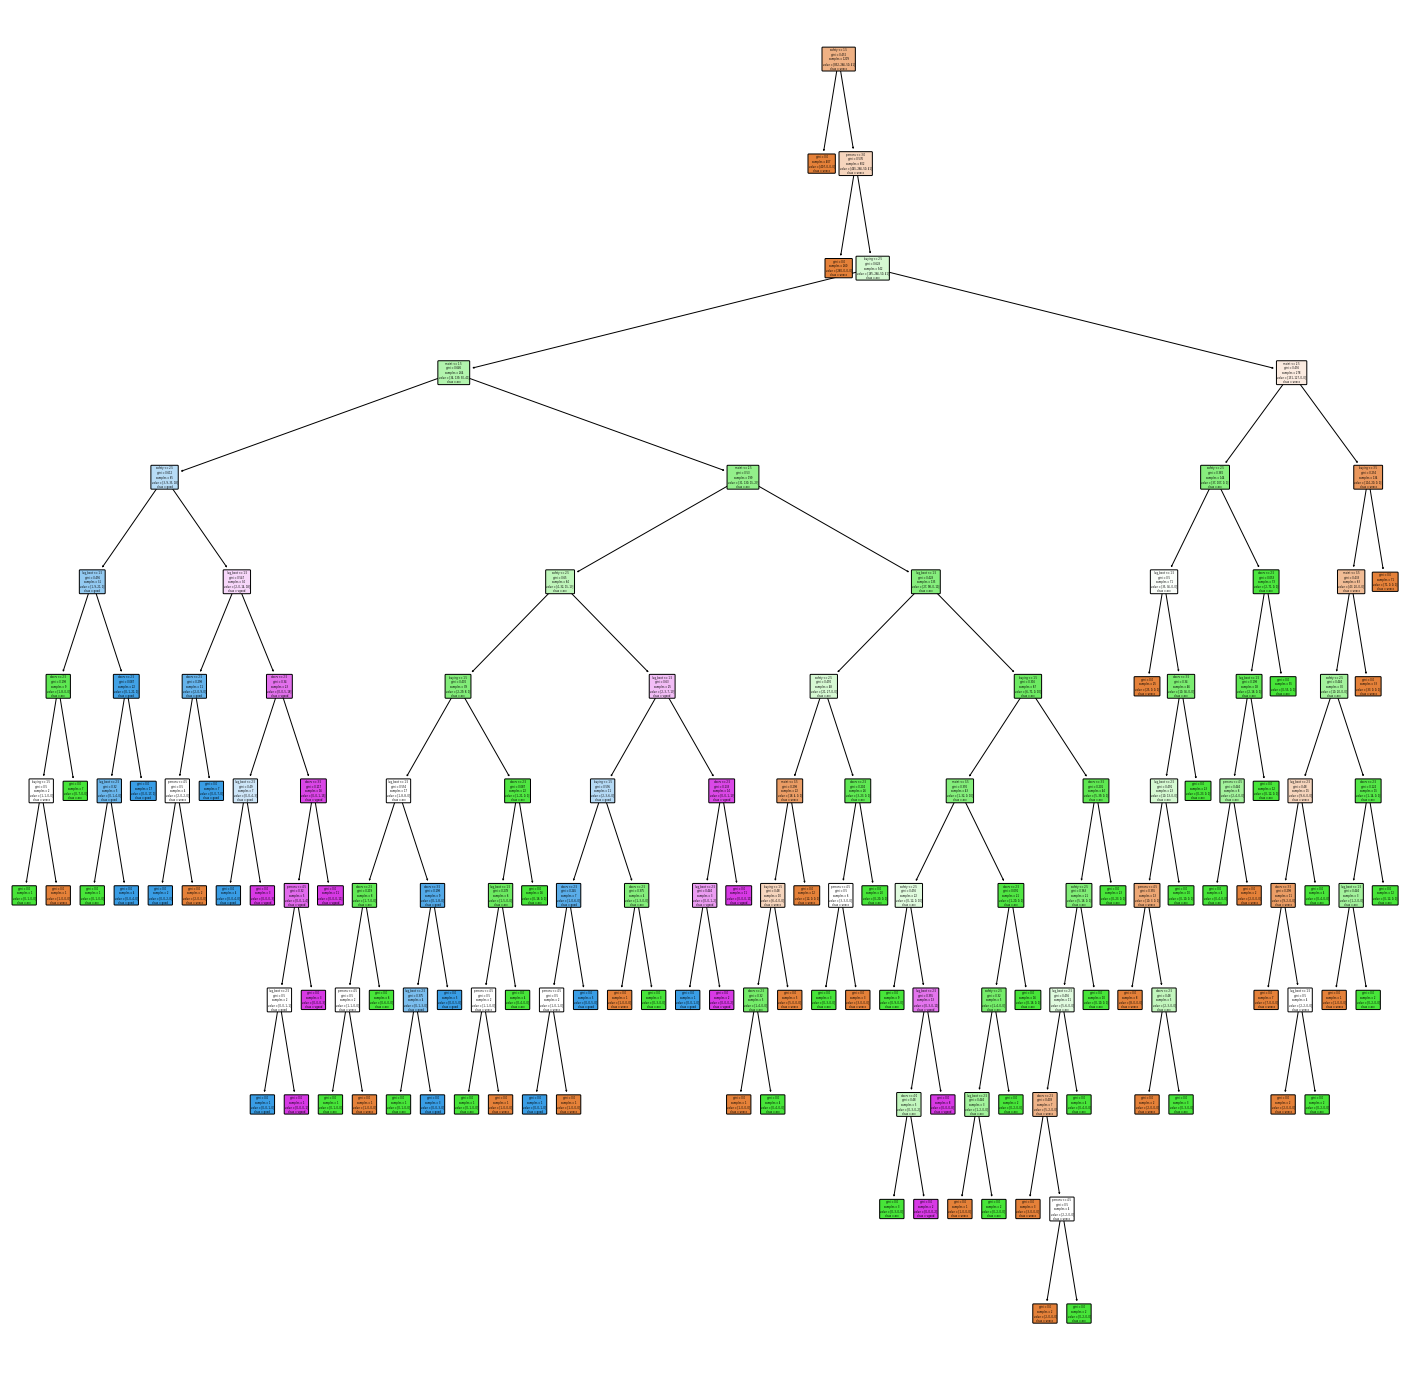

In [38]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 25))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
          feature_names=X.columns)